# Unit 5 - Financial Planning

In [98]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
import warnings 
#Suppress DeprecationWarnings for the entire notebook
warnings.filterwarnings("ignore")

%matplotlib inline

In [99]:
# Load .env enviroment variables
load_dotenv("sample .env3")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [58]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [59]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [60]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42148.82
The current value of your 5.3 ETH is $11758.19


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [62]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [63]:
# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [64]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.52   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832

In [65]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"])
spy_close_price = float(df_investments["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")



Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [66]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,53907.006654
shares,37515.500000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

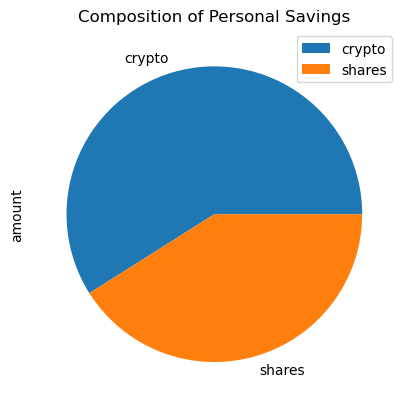

In [68]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [69]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-26', tz='America/New_York').isoformat()

In [70]:
# Get 5 years' worth of historical data for SPY and AGG
## Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.tail()


AGG                                    \
                            open     high     low  close    volume   
timestamp                                                            
2023-06-20 04:00:00+00:00  98.28  98.5050  98.170  98.32   6694190   
2023-06-21 04:00:00+00:00  98.09  98.5300  97.975  98.48   5579941   
2023-06-22 04:00:00+00:00  98.17  98.3250  97.920  97.97   7147656   
2023-06-23 04:00:00+00:00  98.49  98.5000  98.100  98.26   4577451   
2023-06-26 04:00:00+00:00  98.50  98.5125  98.310  98.38  10632271   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2023-06-20 04:00:00+00:00       27802  98.376405  437.45  438.37  435.03   
2023-06-21 04:00:00+00:00       23714  98.294563  436.16  436.99  434.33   
2023-06-22 04:00:00+00:00       23865  98.020982  433.95  436.62  433.60   
2023-06-23 04:00:00+00:00       19181  98.253577  432.93  435.06  432.47   
2023-06-26 04:00:00+00:00       23924  98.405169  432.62  434.61  431.19   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-06-20 04:00:00+00:00  437.18  76171495      551377  437.143537  
2023-06-21 04:00:00+00:00  434.94  76991988      551853  435.564381  
2023-06-22 04:00:00+00:00  436.51  70637175      479203  435.448775  
2023-06-23 04:00:00+00:00  433.21  89196368      540194  433.858782  
2023-06-26 04:00:00+00:00  431.44  72841401      510153  432.514931

In [71]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [72]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2018-06-26 04:00:00+00:00  105.99  106.050  105.9405  106.05  2665247   
2018-06-27 04:00:00+00:00  106.23  106.310  106.1600  106.24  3001405   
2018-06-28 04:00:00+00:00  106.28  106.290  106.1600  106.23  1800528   
2018-06-29 04:00:00+00:00  106.30  106.420  106.2500  106.32  7118842   
2018-07-02 04:00:00+00:00  106.10  106.125  105.9900  105.99  7159907   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-26 04:00:00+00:00       10706  106.003623          NaN  271.64   
2018-06-27 04:00:00+00:00       11551  106.246940     0.001792  272.26   
2018-06-28 04:00:00+00:00        8124  106.226389    -0.000094  269.29   
2018-06-29 04:00:00+00:00       22824  106.321215     0.000847  272.12   
2018-07-02 04:00:00+00:00       17760  106.032887    -0.003104  269.51   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2018-06-26 04:00:00+00:00  272.560  270.7900  271.58   68821261      304136   
2018-06-27 04:00:00+00:00  273.865  269.1800  269.80  105191674      418205   
2018-06-28 04:00:00+00:00  271.750  268.4900  270.91   77075079      367571   
2018-06-29 04:00:00+00:00  273.660  271.1495  271.34  102092599      329522   
2018-07-02 04:00:00+00:00  272.040  269.2400  271.84   63769156      279127   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-26 04:00:00+00:00  271.733259          NaN  
2018-06-27 04:00:00+00:00  271.108875    -0.006554  
2018-06-28 04:00:00+00:00  270.031931     0.004114  
2018-06-29 04:00:00+00:00  272.036249     0.001587  
2018-07-02 04:00:00+00:00  270.689557     0.001843

In [73]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994598,0.999524,1.006525,1.008462,0.995260,0.990212,1.002075,1.001011,0.991833,1.003652,...,0.991202,0.999663,0.993616,0.996055,1.011827,0.998407,0.995123,0.994000,1.005873,0.996795
2,0.992803,1.005022,1.000296,1.009389,0.992487,1.008432,1.002877,1.012795,1.002102,0.998648,...,0.992784,1.005047,0.982978,0.994722,1.009319,1.004015,1.000635,0.994365,1.002589,0.998732
3,0.991359,1.000664,0.999314,1.007575,0.989611,1.017686,1.012869,1.011786,1.011915,0.995917,...,0.999006,1.012734,0.980554,0.994826,1.017523,1.012326,1.004383,0.990876,1.006639,1.007681
4,0.992922,0.994067,0.997195,1.004597,0.992836,1.022883,1.008843,1.006681,1.013106,0.991330,...,0.999318,1.016503,0.974061,1.004062,1.023663,1.007832,1.005853,0.987740,1.008524,1.007797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.102147,1.214352,4.169860,2.820699,4.934393,1.484020,2.623399,7.747915,2.743955,2.619245,...,2.088502,1.709092,3.462664,2.619281,1.057390,3.667865,4.558323,3.661989,0.863757,5.009889
7557,3.126118,1.221116,4.202373,2.802363,4.909614,1.482894,2.602203,7.722316,2.754150,2.650689,...,2.088522,1.695683,3.451395,2.616677,1.059416,3.715804,4.545715,3.684563,0.855865,5.034247
7558,3.152532,1.229979,4.201775,2.815974,4.879550,1.484474,2.603123,7.691071,2.729063,2.677495,...,2.080091,1.693944,3.450822,2.601463,1.064126,3.763790,4.545020,3.692840,0.854652,5.053115
7559,3.169380,1.228019,4.259872,2.833401,4.853116,1.464333,2.629907,7.750249,2.746683,2.666207,...,2.082002,1.696681,3.437618,2.601996,1.070491,3.733460,4.589532,3.675315,0.852319,5.103367


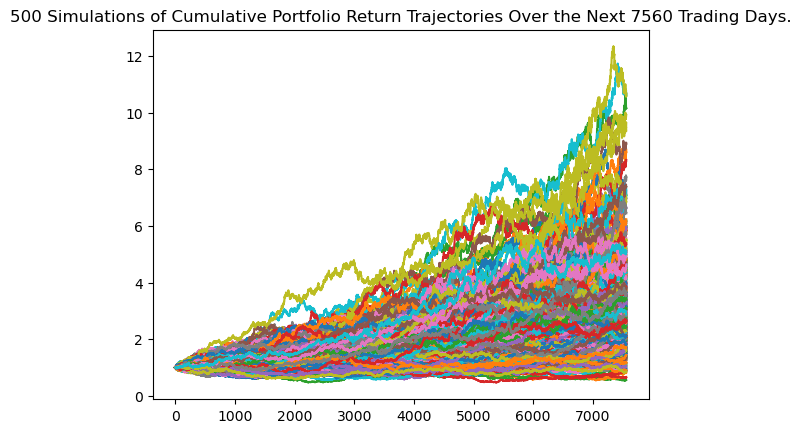

In [74]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

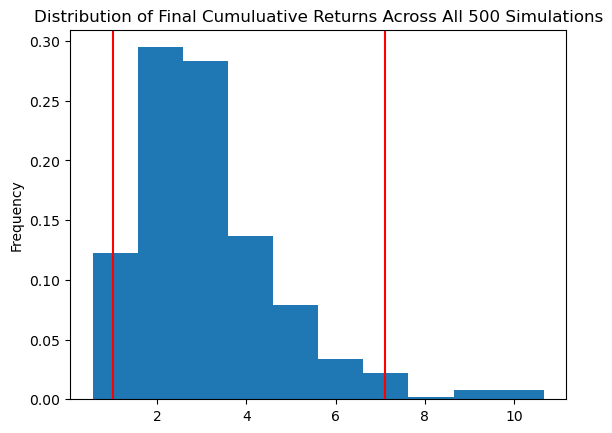

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.127346
std               1.619071
min               0.558752
25%               2.044602
50%               2.783929
75%               3.783193
max              10.668905
95% CI Lower      1.000005
95% CI Upper      7.115609
Name: 7560, dtype: float64


In [77]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20000.1 and $142312.17


In [ ]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [79]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $30000.16 and $213468.26


In [ ]:
Optional Challenge - Early Retirement
Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992851,1.003919,0.998031,0.992077,0.999281,0.999662,1.004928,1.003001,0.996122,1.003371,...,1.000414,1.001570,1.000755,0.997990,0.984245,1.005176,1.000734,1.001727,0.997577,0.996930
2,0.988367,0.996317,0.992764,1.000967,0.994664,0.989675,0.999618,1.006817,0.998835,1.000040,...,1.005666,1.002349,1.010442,1.004920,0.986621,1.012549,1.004068,1.005403,1.003900,1.000388
3,0.987770,0.990503,0.997454,1.008738,1.000065,0.989589,1.003404,1.003949,1.002383,1.009536,...,1.004433,1.011227,1.023581,1.012682,0.994307,1.008964,1.001220,1.005741,1.012422,1.000329
4,0.982849,0.990622,0.991142,1.011906,1.008599,0.992468,1.014220,1.003620,1.000582,1.007262,...,1.006334,1.007261,1.025724,1.011198,0.991322,1.004571,0.997420,1.003423,1.006526,1.005167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.143745,0.806835,0.914681,1.139695,1.180775,1.195397,1.781122,1.275607,0.926482,0.897337,...,1.097130,0.773788,1.004544,1.408132,1.217423,1.251410,1.488250,1.006354,1.081106,1.054326
1257,1.127898,0.810901,0.922313,1.134881,1.178038,1.189912,1.774182,1.278004,0.925535,0.894305,...,1.092491,0.774376,1.004730,1.421914,1.220479,1.238902,1.495289,1.018560,1.087050,1.056442
1258,1.124184,0.805170,0.914965,1.138207,1.167786,1.199531,1.782321,1.263678,0.927988,0.895138,...,1.099328,0.771222,1.001684,1.435000,1.221934,1.239162,1.487898,1.024111,1.085511,1.069337
1259,1.125976,0.809957,0.916234,1.141471,1.160887,1.192073,1.769621,1.279585,0.933092,0.887686,...,1.089139,0.768312,0.998207,1.450561,1.221504,1.233015,1.491677,1.025662,1.086199,1.068448


In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyears = MCSimulation(
    portfolio_data = tickers_df,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

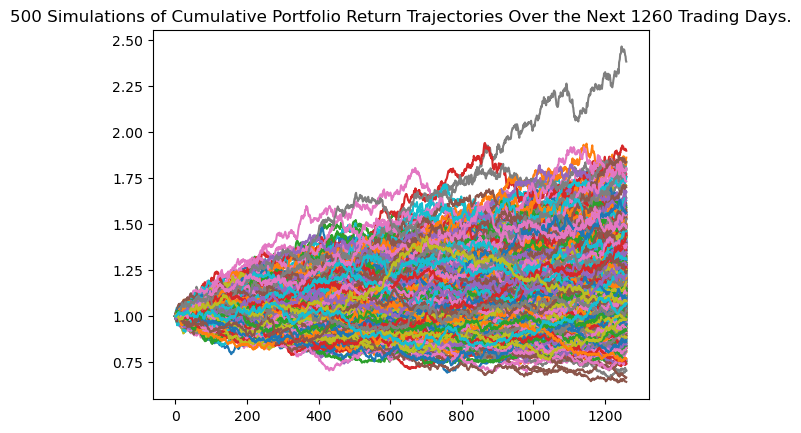

In [82]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

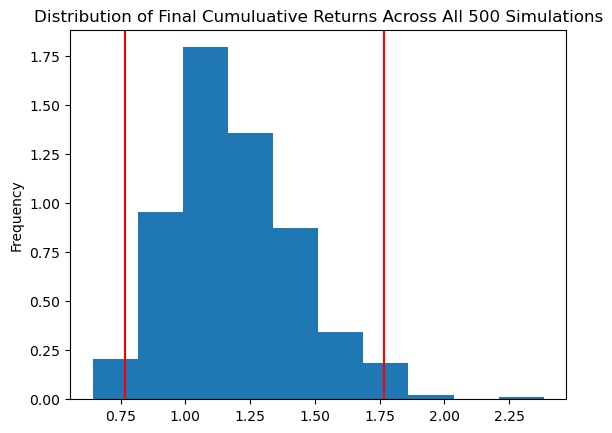

In [83]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.188475
std               0.243192
min               0.643145
25%               1.018961
50%               1.160130
75%               1.339653
max               2.383324
95% CI Lower      0.769166
95% CI Upper      1.765237
Name: 1260, dtype: float64


In [90]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower = round(tbl[8]*60000,2)
ci_upper = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $46149.97 and $105914.22


In [ ]:
Ten Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [92]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989206,1.002888,0.995757,1.004879,0.995893,1.002629,0.993308,1.003247,0.998964,0.998293,...,0.996122,1.006299,1.003105,0.983657,1.004891,0.994575,0.996474,0.995358,1.003579,1.009281
2,0.989347,0.999144,1.003048,1.021698,0.993119,1.000984,0.988586,1.000178,1.003602,1.004054,...,0.995905,1.004334,1.001060,0.977349,1.000960,0.999419,1.005504,0.995332,0.993010,1.001667
3,0.991566,0.994629,1.005234,1.020574,0.987685,1.007137,0.995258,1.004508,0.999158,1.007191,...,1.004596,0.997890,0.991681,0.984795,1.004041,0.995968,1.007832,0.994527,0.998349,0.997196
4,0.999735,0.987615,1.002080,1.022433,0.987855,1.012816,1.001589,0.999341,0.990601,1.000942,...,1.021935,1.001095,0.997931,0.990627,0.988708,0.989197,1.010776,0.993363,1.001184,0.994310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.181171,1.068947,1.094042,1.557494,1.420975,1.113432,2.031543,1.765208,1.254290,2.542030,...,1.818414,2.243889,1.803429,1.356717,0.835955,1.297289,1.177577,1.425566,1.438439,0.932091
2517,1.179419,1.061951,1.087361,1.554382,1.437107,1.117487,2.026965,1.742065,1.272356,2.523988,...,1.832435,2.247272,1.804626,1.335382,0.830820,1.296172,1.175416,1.444949,1.448455,0.941301
2518,1.178846,1.056178,1.086901,1.560617,1.432329,1.127490,2.039139,1.748832,1.280130,2.547780,...,1.840836,2.231240,1.801081,1.338019,0.832787,1.300478,1.176200,1.446523,1.454295,0.946143
2519,1.175439,1.051448,1.093999,1.574998,1.436672,1.123228,2.066182,1.743308,1.278295,2.534444,...,1.839724,2.236096,1.817671,1.343772,0.831396,1.290675,1.170696,1.448440,1.460293,0.946422


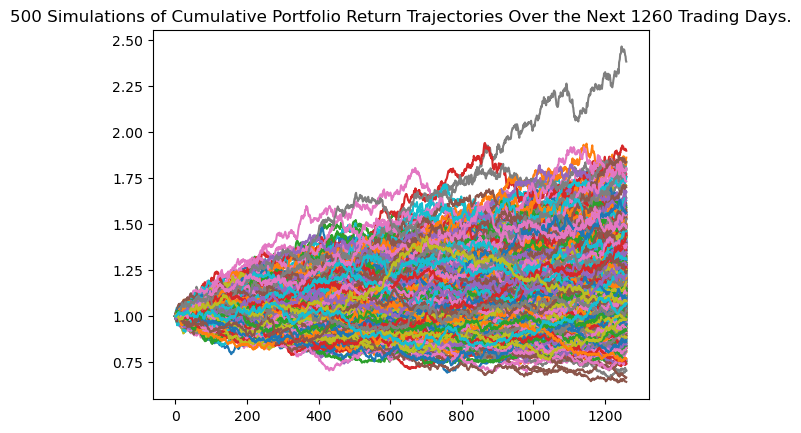

In [93]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

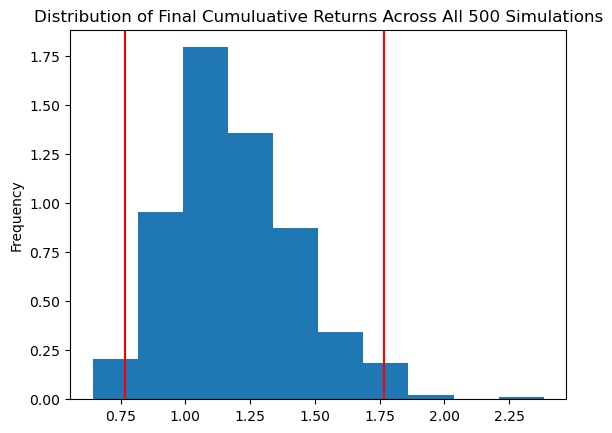

In [94]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.477244
std               0.426687
min               0.585522
25%               1.172052
50%               1.414065
75%               1.726690
max               3.470481
95% CI Lower      0.802001
95% CI Upper      2.425837
Name: 2520, dtype: float64


In [97]:
# Set initial investment
initial_investment = 30000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $48120.05 and $145550.22
